# ML Pipeline - Model Training

In [43]:
# data wrangling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# to  save model
import joblib 

# build model
from sklearn.linear_model import Lasso

# model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# visualise all columns 
pd.pandas.set_option('display.max_columns', None)

In [44]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')


X_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.0,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.0,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.0,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0


In [45]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head(4)

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393


In [46]:
# load pre-selected feature from feature selection notebook

features = pd.read_csv('selected_features.csv')
features.head(2)

,0
0,MSSubClass
1,MSZoning


In [47]:
features = features['0'].to_list()

features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'SaleCondition']

In [48]:
X_train = X_train[features]
X_test = X_test[features]

In [52]:
y_test.shape

(146, 1)

In [51]:
X_test.shape

(146, 36)

### Regularise linear Regression: Lasso

In [49]:
# random seed -> for reproduceability purpose

lin_model = Lasso(alpha=0.001, random_state=0)

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [57]:
# evaluate the model: 
# mse, rmse and r2 will be used for model evaluation

# make prediction on train set
pred = lin_model.predict(X_train)

# np.exp -> convert log transform to original value
print(f'train mse: {int(mean_squared_error(np.exp(y_train), np.exp(pred)))}') 

print(f'train rmse: {int(mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))}')

print(f'train r2: {r2_score(np.exp(y_train), np.exp(pred))}')

print('====================================')


pred = lin_model.predict(X_test)


print(f'test mse: {int(mean_squared_error(np.exp(y_test), np.exp(pred)))}')

print(f'test rmse: {int(mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))}')

print(f'test r2: {r2_score(np.exp(y_test), np.exp(pred))}')


print('Average house price ', int(np.exp(y_train).median()))

train mse: 781396538
train rmse: 27953
train r2: 0.8748530463468015
test mse: 1060767982
test rmse: 32569
test r2: 0.8456417073258413
Average house price  163000


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

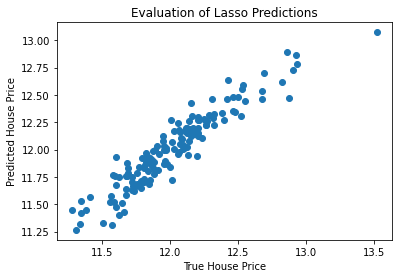

In [59]:
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [60]:
y_test.reset_index(drop=True)

,SalePrice
0,12.209188
1,11.798104
2,11.608236
3,12.165251
4,11.385092
...,...
141,11.884489
142,12.287653
143,11.921718
144,11.598727


In [61]:
y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))

preds

0      12.148226
1      11.919326
2      11.677107
3      12.304289
4      11.447473
         ...    
141    11.775100
142    12.316546
143    11.955957
144    11.757571
145    12.072691
Length: 146, dtype: float64

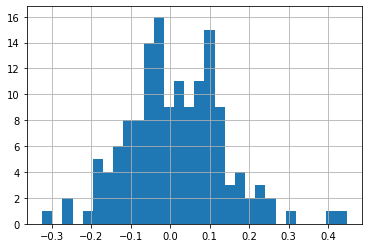

In [62]:
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

In [ ]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace =True, ascending = False)
importance.plot.bar(figsize=(18, 6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')